<a href="https://colab.research.google.com/github/jhmsoriano/FTW_Activities/blob/main/Data_prep_with_Titanic_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Preparation with Python

We will be cleansing and preparing the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic) for visualizations and modeling.


### The Data
Let's start by reading in the titanic_train.csv file into a pandas dataframe.

**Data Preprocessing generally involves below steps:**

- Importing libraries
- Getting the dataset
- Finding Missing Data
- Further Understanding the Data Set

## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the dataset

In [5]:
train = pd.read_csv('https://raw.githubusercontent.com/jhmsoriano/FTW_Activities/main/Data%20Prep/train.csv')

# calling this train since the actual titanic dataset comes in a zip file of 3 files, train, test, and gender

In [6]:
# display the first few rows of the dataframe 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# display the last few rows of the dataframe 
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
# print columns 
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

We can use the following Python functions to further explore our data.

In [9]:
# quick look at our dataset, data types, and number of nulls
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# rows , colunms --> get the size of the dataframe 
train.shape

(891, 12)

In [11]:
# to better understand the numeric data, we want to use the .describe() method
# This gives us an understanding of the central tendencies of the data 

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# quick way to separate numeric columns
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [13]:
# look at numeric and categorical values separately 
df_num = train[['Age','SibSp','Parch','Fare']]
df_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

# We will need to convert numerical columns such as Survived and Pclass as categorical
# as each number represents a label (and it will not make sense for the numbers to be aggregated).

In [14]:
df_num

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
888,NaN,1,2,23.4500
889,26.0,0,0,30.0000


In [15]:
df_cat

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
0,0,3,male,A/5 21171,NaN,S
1,1,1,female,PC 17599,C85,C
2,1,3,female,STON/O2. 3101282,NaN,S
3,1,1,female,113803,C123,S
4,0,3,male,373450,NaN,S
...,...,...,...,...,...,...
886,0,2,male,211536,NaN,S
887,1,1,female,112053,B42,S
888,0,3,female,W./C. 6607,NaN,S
889,1,1,male,111369,C148,C


## Finding Missing Data

We'll be using seaborn to create a simple heatmap to identify any missing data.

In [16]:
# Check number of null values in a column

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

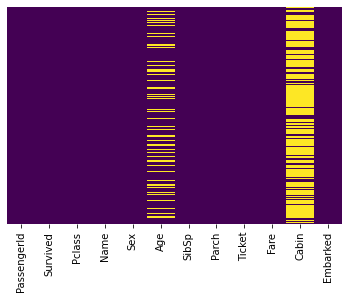

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Based from the heatmap, we can see that the ‘Cabin’ column has the most number of missing values. For this example, we will be dropping it.

Roughly 20% of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation.

In [18]:
train.drop('Cabin',axis=1,inplace=True)

<Axes: >

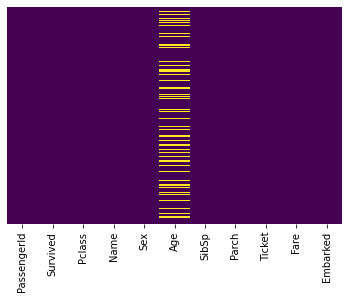

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
# Check number of null values in a column

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Further Understanding the Data Set

## Detecting Outliers

Let's take a deeper look into the numerical data that we have. How are these columns distributed?

<Axes: >

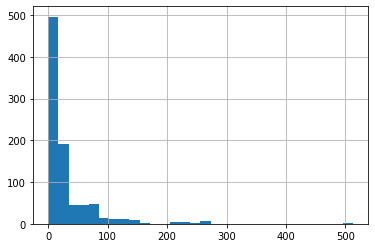

In [25]:
train['Fare'].hist(bins=30)

<Axes: xlabel='Fare'>

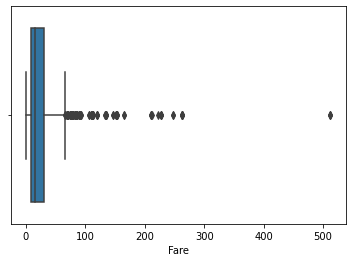

In [24]:
sns.boxplot(data = train, x = 'Fare')

In [23]:
train[train['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


<Axes: >

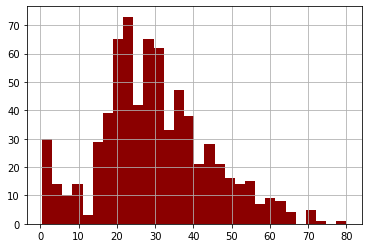

In [26]:
train['Age'].hist(bins=30,color='darkred')

<Axes: xlabel='SibSp', ylabel='count'>

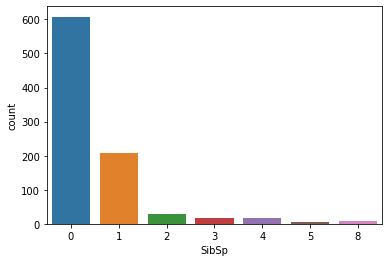

In [27]:
sns.countplot(x='SibSp',data=train)

## Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However, we can be smarter about this and check the average age by passenger class. For example:

<Axes: xlabel='Pclass', ylabel='Age'>

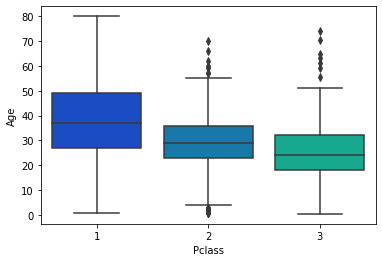

In [28]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [29]:
train[train['Pclass'] == 1].mean()

<ipython-input-29-18148f38e3cf>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train[train['Pclass'] == 1].mean()


PassengerId    461.597222
Survived         0.629630
Pclass           1.000000
Age             38.233441
SibSp            0.416667
Parch            0.356481
Fare            84.154687
dtype: float64

In [30]:
train[train['Pclass'] == 2].mean()

<ipython-input-30-9c3d60113c28>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train[train['Pclass'] == 2].mean()


PassengerId    445.956522
Survived         0.472826
Pclass           2.000000
Age             29.877630
SibSp            0.402174
Parch            0.380435
Fare            20.662183
dtype: float64

In [31]:
train[train['Pclass'] == 3].mean()

<ipython-input-31-d62c8503f9ac>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train[train['Pclass'] == 3].mean()


PassengerId    439.154786
Survived         0.242363
Pclass           3.000000
Age             25.140620
SibSp            0.615071
Parch            0.393075
Fare            13.675550
dtype: float64

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [32]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

Time to apply the function:

In [33]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [34]:
# Check number of null values in a column

train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Let's go ahead and drop the rows in Embarked that have missing values.

In [35]:
train.dropna(inplace=True)

In [36]:
# Check number of null values in a column

train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Convert Data Types

Change age from float to integer

In [37]:
train['Age'] = train['Age'].astype(int)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


## Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise, our machine learning algorithm won't be able to directly take in those features as inputs.

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int64  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  title        889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 90.3+ KB


In [41]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [42]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [43]:
train = pd.concat([train,sex,embark],axis=1)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,title,male,Q,S
0,1,0,3,22,1,0,7.2500,Mr,1,0,1
1,2,1,1,38,1,0,71.2833,Mrs,0,0,0
2,3,1,3,26,0,0,7.9250,Miss,0,0,1
3,4,1,1,35,1,0,53.1000,Mrs,0,0,1
4,5,0,3,35,0,0,8.0500,Mr,1,0,1


## Other exploration

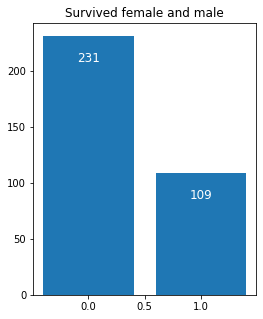

In [45]:
#Survivial number according to gender or sex i.e. Male and Female
survived_sex = train.groupby('male')['Survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')
for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

Here we see the survival rate across all the classes. We can do this by taking the sum of survived passengers for each class and dividing it by the total number of passengers for that class and multiplying by 100. Here, we will use the pandas groupby() function to segregate passengers according to their class.

In [46]:
#sns.plt.hist(df_cleaned.groupby(['Pclass', 'Survived', 'Sex']).size())
grouped_by_pclass = train.groupby(['Pclass', 'Survived', 'male'])
grouped_by_pclass.size()

Pclass  Survived  male
1       0         0         3
                  1        77
        1         0        89
                  1        45
2       0         0         6
                  1        91
        1         0        70
                  1        17
3       0         0        72
                  1       300
        1         0        72
                  1        47
dtype: int64

In [47]:
train.groupby(['Pclass'])['Survived'].sum()/train.groupby(['Pclass'])['Survived'].count()*100

Pclass
1    62.616822
2    47.282609
3    24.236253
Name: Survived, dtype: float64

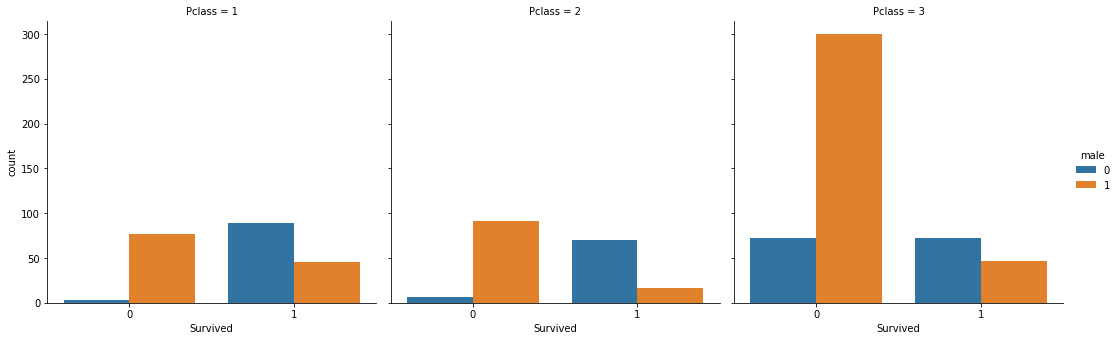

In [53]:
sns.catplot(x= 'Survived', col='Pclass', hue='male', data=train, kind='count')
plt.subplots_adjust(top=0.9)